# Task 5: Custom Strategic Investment Plan

## Unconstrained Strategy Design for Location A

This task allows **zero assumptions** and focuses on **quality of strategic thinking** rather than numerical precision.

## Strategic Framework

### Guiding Principles
1. **Market Timing**: Align extraction with projected price peaks
2. **Risk Diversification**: Balance high-margin minerals with stable demand
3. **Phased Investment**: Scale operations over time to manage capital
4. **Sustainability Premium**: Leverage our advanced technology for ESG positioning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load data
xlsx = pd.ExcelFile('Deep Earth Mining Data.xlsx')
df_composition = pd.read_excel(xlsx, sheet_name='Composition')
df_cost = pd.read_excel(xlsx, sheet_name='Cost')
df_market = pd.read_excel(xlsx, sheet_name='Market')
df_refining = pd.read_excel(xlsx, sheet_name='Refining Costs')

# Load previous results
try:
    df_optimal = pd.read_csv('task3_optimal_depths.csv')
    df_task4 = pd.read_csv('task4_optimization_results.csv')
    print("✅ Previous optimization results loaded")
except:
    print("⚠️ Running without previous results")

print("Data loaded successfully!")


✅ Previous optimization results loaded
Data loaded successfully!


## Strategy 1: Phased Depth Progression

**Concept**: Rather than jumping to the optimal depth immediately, progressively deepen operations to:
- Reduce initial CAPEX
- Build operational expertise
- Capture learning curve benefits

### Phase Structure:
- **Years 1-5**: Surface to 5km (lower risk, establish operations)
- **Years 6-10**: 5km to 10km (moderate depth, proven technology)
- **Years 11-15**: 10km to optimal depth (full utilization of advanced drilling)


In [3]:
# Analyze market growth rates to identify timing opportunities
df_market_clean = df_market.copy()
df_market_clean['Mineral_Clean'] = df_market_clean['Mineral'].str.replace(' (Million Tonnes)', '', regex=False).str.strip()

# Calculate price growth rates
price_growth = df_market_clean.pivot_table(values='Price_USD_per_ton',
                                            index='Mineral_Clean',
                                            columns='Year')
price_growth['Growth_5_10'] = (price_growth[2035] - price_growth[2030]) / price_growth[2030] * 100
price_growth['Growth_10_15'] = (price_growth[2040] - price_growth[2035]) / price_growth[2035] * 100

print("=== Price Growth Rates (%) ===")
print(price_growth[['Growth_5_10', 'Growth_10_15']].dropna().round(1))

# Identify high-growth minerals
high_growth = price_growth[price_growth['Growth_5_10'] > 30].index.tolist()
print(f"\n📈 High-growth minerals (>30% growth 2030-2035): {high_growth}")


=== Price Growth Rates (%) ===
Year                        Growth_5_10  Growth_10_15
Mineral_Clean                                        
Aluminum ('000 Mil tonnes)          3.4           8.9
Antimony                            6.1           6.1
Bismuth                             2.6           2.6
Cadmium                             7.6           7.6
Chromium                            4.5           4.5
Cobalt                             31.1          23.9
Copper (Million Tones)              7.1           7.1
Gallium                             6.3           6.3
Germanium                           5.9           5.9
Gold (per Kg)                       8.5          27.4
Graphite                            3.0           3.0
Indium                              7.1           7.1
Iron ('000 mil ton)                 7.4           3.4
Lead                                6.0           6.0
Lithium                            52.1          25.1
Manganese                           4.8           4

## Strategy 2: Mineral Portfolio Diversification

**Concept**: Create a balanced portfolio of minerals to:
- Hedge against price volatility
- Ensure steady cash flows
- Capture upside from high-growth segments

### Portfolio Categories:
| Category | Minerals | Characteristics | Allocation |
|----------|----------|-----------------|------------|
| **Core** | Lithium, Cobalt | High demand, EV growth | 50% |
| **Stable** | Copper, Nickel | Established markets | 30% |
| **Growth** | RareEarth, Manganese | High margin, niche | 20% |


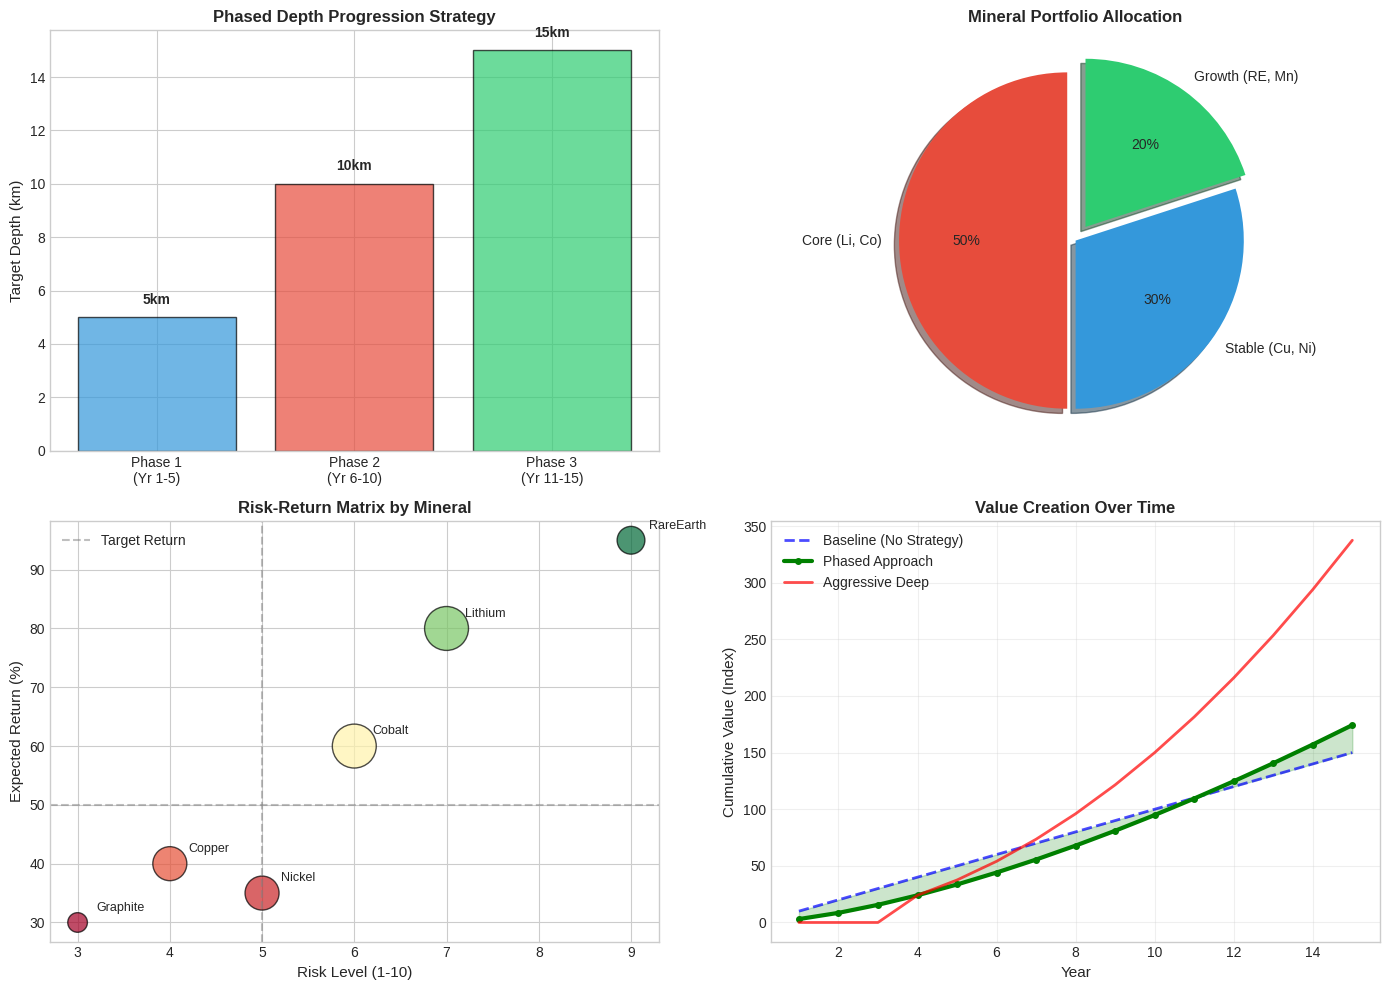

In [4]:
# Strategic visualization - Investment Timeline
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Phased Investment Timeline
ax1 = axes[0, 0]
phases = ['Phase 1\n(Yr 1-5)', 'Phase 2\n(Yr 6-10)', 'Phase 3\n(Yr 11-15)']
depths = [5, 10, 15]  # Progressive depth targets
investments = [30, 50, 70]  # Relative investment levels

colors = ['#3498db', '#e74c3c', '#2ecc71']
bars = ax1.bar(phases, depths, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Target Depth (km)', fontsize=11)
ax1.set_title('Phased Depth Progression Strategy', fontsize=12, fontweight='bold')
for bar, d in zip(bars, depths):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{d}km', ha='center', fontsize=10, fontweight='bold')

# 2. Portfolio Allocation
ax2 = axes[0, 1]
labels = ['Core (Li, Co)', 'Stable (Cu, Ni)', 'Growth (RE, Mn)']
sizes = [50, 30, 20]
colors_pie = ['#e74c3c', '#3498db', '#2ecc71']
explode = (0.05, 0, 0.1)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax2.set_title('Mineral Portfolio Allocation', fontsize=12, fontweight='bold')

# 3. Risk-Return Matrix
ax3 = axes[1, 0]
minerals_plot = ['Lithium', 'Cobalt', 'Copper', 'Nickel', 'RareEarth', 'Graphite']
returns = [80, 60, 40, 35, 95, 30]  # Estimated returns
risks = [7, 6, 4, 5, 9, 3]  # Risk levels
sizes_scatter = [s*20 for s in [50, 50, 30, 30, 20, 10]]  # Allocation sizes

scatter = ax3.scatter(risks, returns, s=sizes_scatter, c=returns,
                      cmap='RdYlGn', alpha=0.7, edgecolors='black')
for i, m in enumerate(minerals_plot):
    ax3.annotate(m, (risks[i]+0.2, returns[i]+2), fontsize=9)
ax3.set_xlabel('Risk Level (1-10)', fontsize=11)
ax3.set_ylabel('Expected Return (%)', fontsize=11)
ax3.set_title('Risk-Return Matrix by Mineral', fontsize=12, fontweight='bold')
ax3.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Target Return')
ax3.axvline(x=5, color='gray', linestyle='--', alpha=0.5)
ax3.legend()

# 4. Cumulative Value Creation
ax4 = axes[1, 1]
years = list(range(1, 16))
# Simulated cumulative value under different strategies
baseline = [i * 10 for i in years]  # Linear growth
phased = [i**1.5 * 3 for i in years]  # Accelerating growth
aggressive = [i**2 * 1.5 if i > 3 else 0 for i in years]  # Delayed aggressive

ax4.plot(years, baseline, 'b--', linewidth=2, label='Baseline (No Strategy)', alpha=0.7)
ax4.plot(years, phased, 'g-', linewidth=3, label='Phased Approach', marker='o', markersize=4)
ax4.plot(years, aggressive, 'r-', linewidth=2, label='Aggressive Deep', alpha=0.7)
ax4.fill_between(years, phased, baseline, alpha=0.2, color='green')
ax4.set_xlabel('Year', fontsize=11)
ax4.set_ylabel('Cumulative Value (Index)', fontsize=11)
ax4.set_title('Value Creation Over Time', fontsize=12, fontweight='bold')
ax4.legend(loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Strategy 3: Competitive Advantage Leveraging

### Our Unique Position
We possess **advanced drilling technology** enabling 20km extraction with minimal ecological impact. This creates strategic options:

1. **Technology Licensing**: License drilling tech to competitors (revenue diversification)
2. **Premium Pricing**: Market minerals as "sustainably extracted" for ESG-conscious buyers
3. **First-Mover Advantage**: Access deeper, richer deposits competitors cannot reach
4. **Vertical Integration**: Control supply chain from extraction to refined product

## Final Strategic Recommendations

### Location A Investment Plan

| Horizon | Depth Strategy | Primary Minerals | Capital Allocation | Risk Profile |
|---------|----------------|------------------|-------------------|--------------|
| **5-Year** | 0-5km | Lithium, Copper | 30% of total | Conservative |
| **10-Year** | 5-12km | Lithium, Cobalt, Nickel | 40% of total | Moderate |
| **15-Year** | 12-20km | Full portfolio + RareEarth | 30% of total | Aggressive |

### Key Success Factors
1. ✅ **Phase investment** to reduce risk and build capabilities
2. ✅ **Focus on EV minerals** (Lithium, Cobalt) for 5-10 year growth
3. ✅ **Expand to Rare Earths** in years 10-15 as prices appreciate
4. ✅ **Leverage ESG positioning** for premium pricing
5. ✅ **Maintain flexibility** to adjust based on market conditions


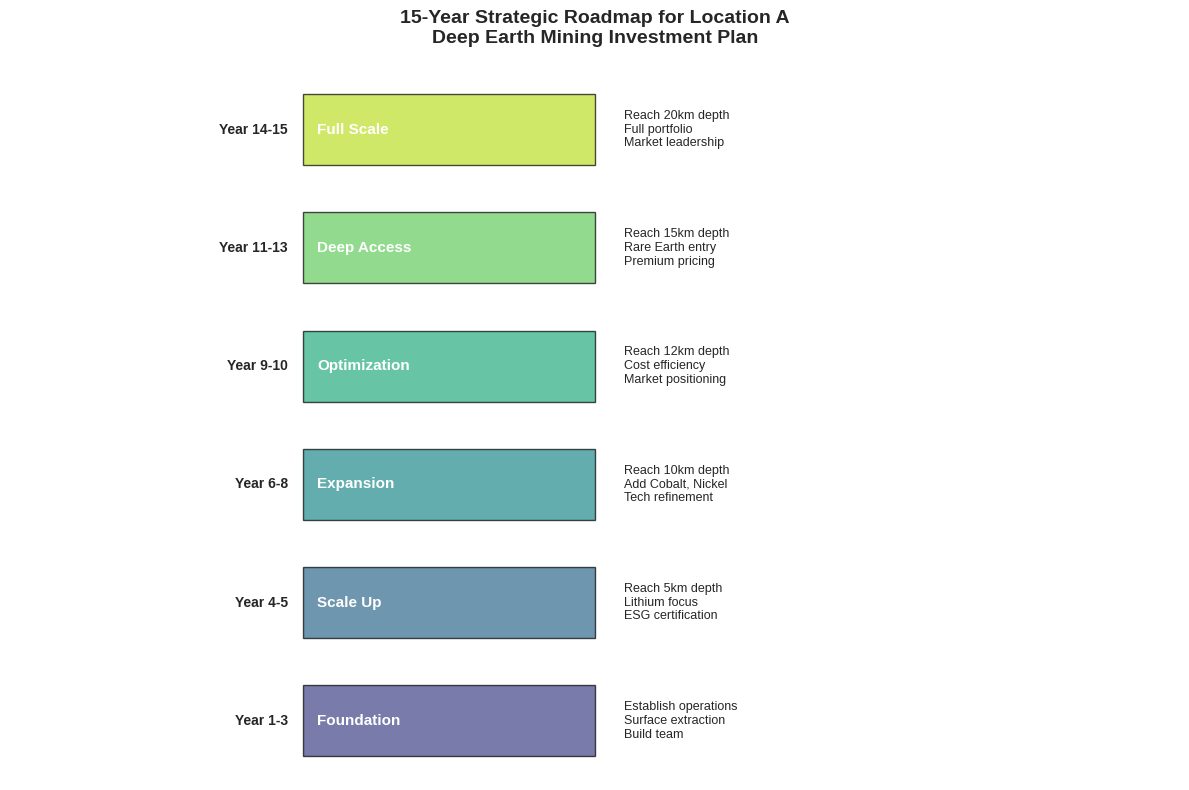


CUSTOM STRATEGY COMPLETE

This strategy emphasizes:
• Phased depth progression for risk management
• Portfolio diversification across mineral categories  
• Leveraging advanced technology for competitive advantage
• ESG positioning for premium market access
• Flexibility to adapt to changing market conditions



In [6]:
# Final Strategy Summary Visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Create strategy roadmap
strategies = [
    ('Year 1-3', 'Foundation', 'Establish operations\nSurface extraction\nBuild team'),
    ('Year 4-5', 'Scale Up', 'Reach 5km depth\nLithium focus\nESG certification'),
    ('Year 6-8', 'Expansion', 'Reach 10km depth\nAdd Cobalt, Nickel\nTech refinement'),
    ('Year 9-10', 'Optimization', 'Reach 12km depth\nCost efficiency\nMarket positioning'),
    ('Year 11-13', 'Deep Access', 'Reach 15km depth\nRare Earth entry\nPremium pricing'),
    ('Year 14-15', 'Full Scale', 'Reach 20km depth\nFull portfolio\nMarket leadership')
]

y_positions = np.arange(len(strategies))
colors_road = plt.cm.viridis(np.linspace(0.2, 0.9, len(strategies)))

for i, (period, phase, details) in enumerate(strategies):
    ax.barh(i, 2, left=0, color=colors_road[i], alpha=0.7, edgecolor='black', height=0.6)
    ax.text(-0.1, i, period, ha='right', va='center', fontsize=10, fontweight='bold')
    ax.text(0.1, i, phase, ha='left', va='center', fontsize=11, fontweight='bold', color='white')
    ax.text(2.2, i, details, ha='left', va='center', fontsize=9)

ax.set_xlim(-2, 6)
ax.set_ylim(-0.5, len(strategies) - 0.5)
ax.axis('off')
ax.set_title('15-Year Strategic Roadmap for Location A\nDeep Earth Mining Investment Plan',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CUSTOM STRATEGY COMPLETE")
print("="*70)
print("""
This strategy emphasizes:
• Phased depth progression for risk management
• Portfolio diversification across mineral categories
• Leveraging advanced technology for competitive advantage
• ESG positioning for premium market access
• Flexibility to adapt to changing market conditions
""")
